In [97]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab import drive
import pickle
from IPython.display import display
from scipy.interpolate import griddata
import matplotlib.cm as cm
import matplotlib
import panel as pn
import math


# Definzione delle costanti
IMG_DIR = '/content/drive/MyDrive/Uni/Magistrale/Sensori/Immagini 3D nuove/' # Cartella contenente le immagini
# Lista delle immagini
img_laser_name = ['25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg'] # Immagini master con lama di luce a diverse quote
zsg_array = np.arange(0, 110, 10)

# Definzione della cartella di output nel drive
OUTDIR = '/content/drive/MyDrive/Uni/Magistrale/Sensori/Immagini 3D nuove/out/' # Cartella di output per salvare i risultati della taratura

# File contenente la matrice m
MATRIX_M_FILENAME = 'matrixM.dump'

# Importazione dei file presenti sulla cartella Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Importazione delle variabili utili per la calibrazione della lama di luce
with open(os.path.join(OUTDIR, MATRIX_M_FILENAME), 'rb') as f:
    m = pickle.load(f)

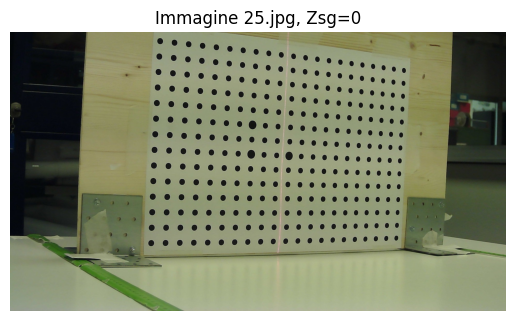

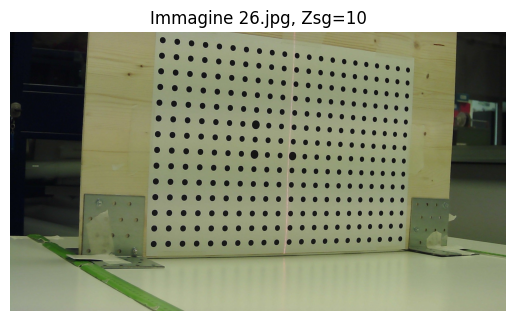

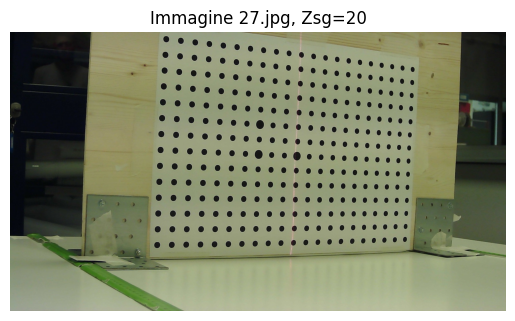

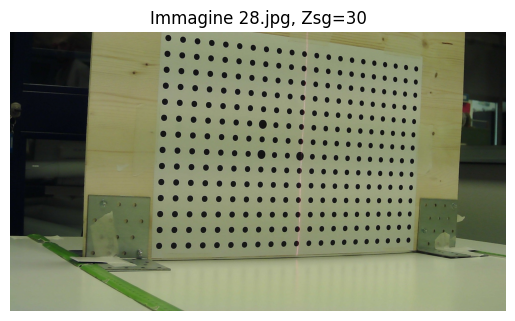

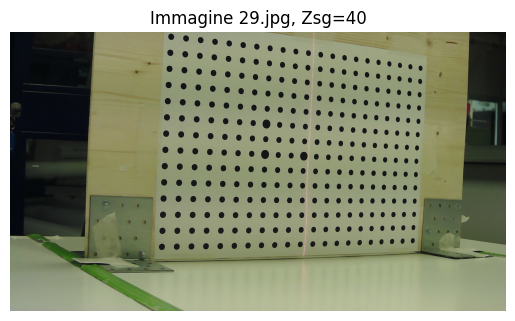

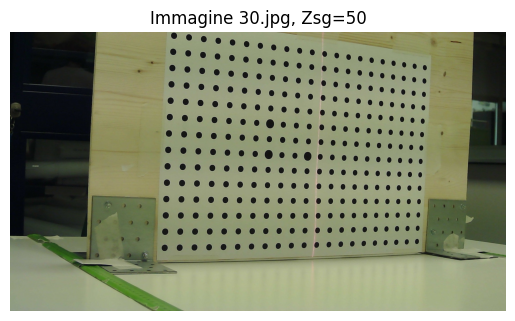

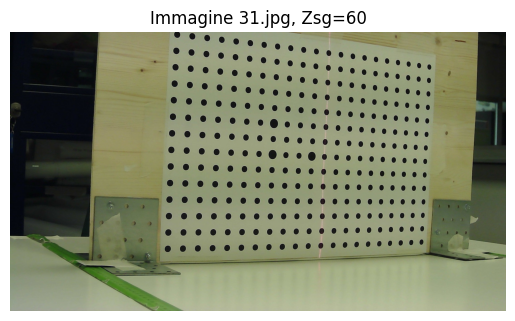

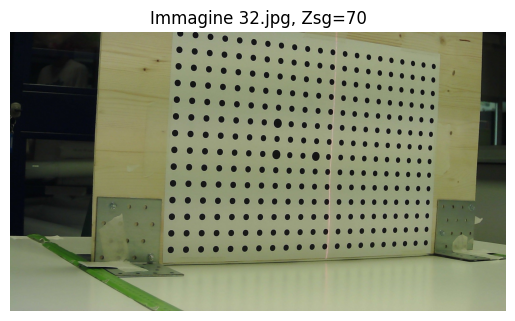

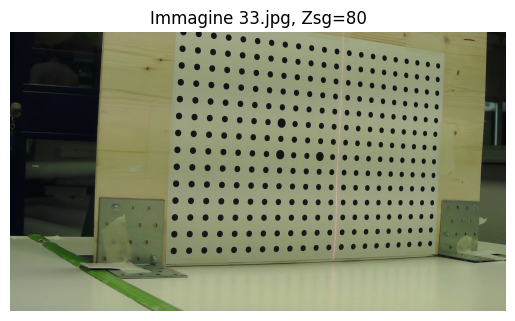

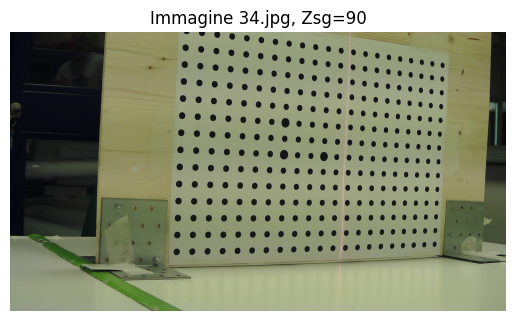

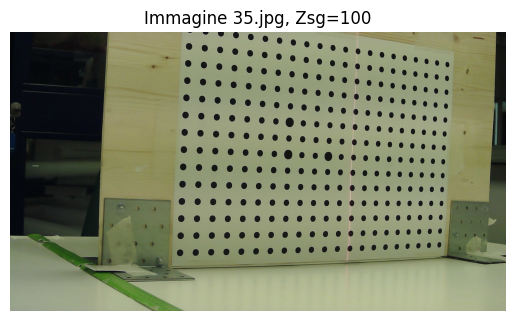

In [99]:
# Importazione delle immagini con la lama di luce a diverse quote
img_laser = []
for name in img_laser_name:
  img_laser_temp = cv.imread(os.path.join(IMG_DIR, name), cv.IMREAD_COLOR)
  assert img_laser_temp is not None, "ERRORE: File non trovato!"
  img_laser_temp = cv.cvtColor(img_laser_temp, cv.COLOR_BGR2RGB)
  img_laser.append(img_laser_temp)

# Plot delle immagini
for i, img in enumerate(img_laser):
    plt.imshow(img)
    plt.title(f'Immagine {img_laser_name[i]}, Zsg={zsg_array[i]}')
    plt.axis('off')
    plt.show()

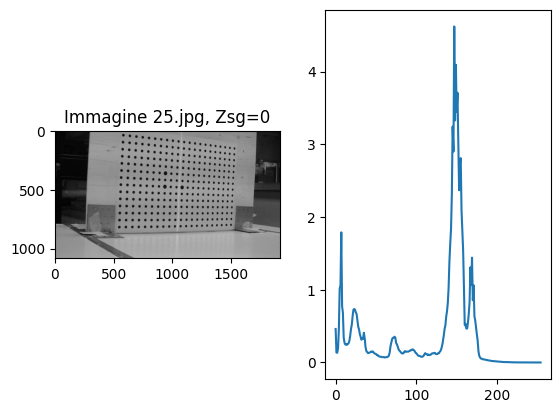

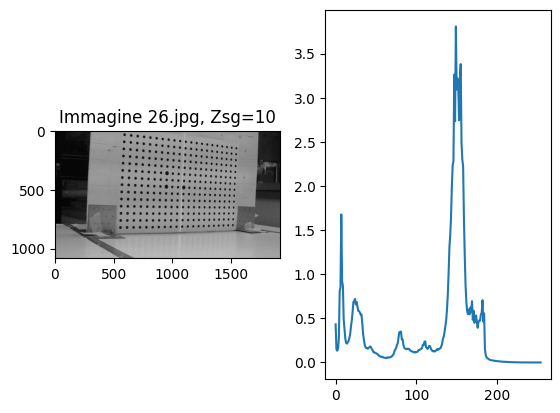

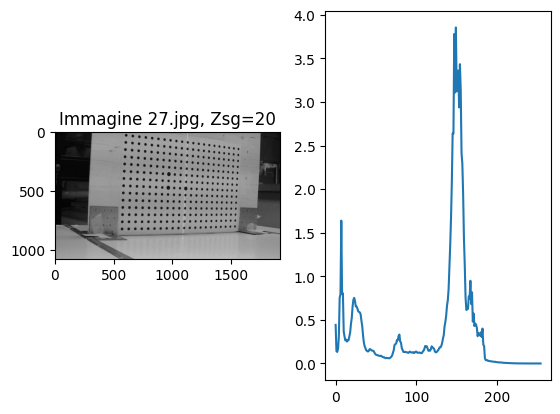

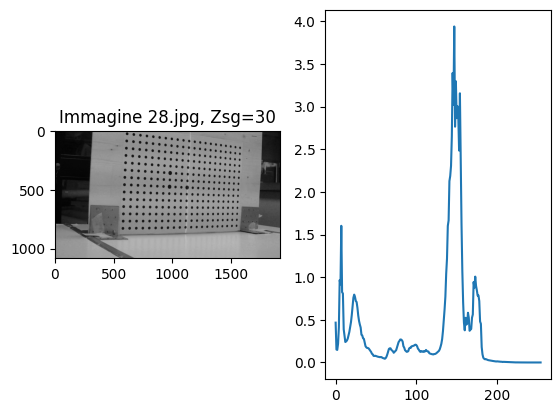

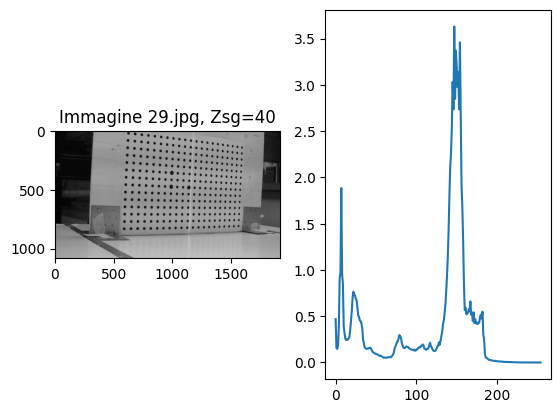

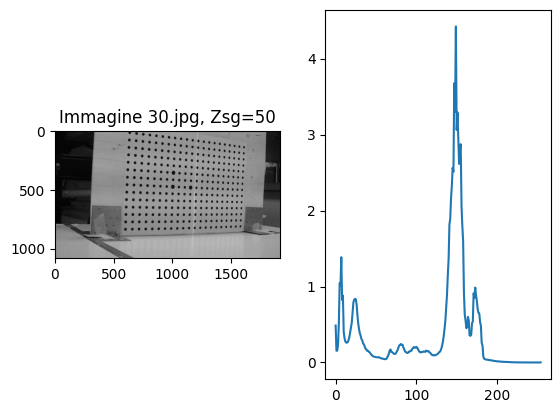

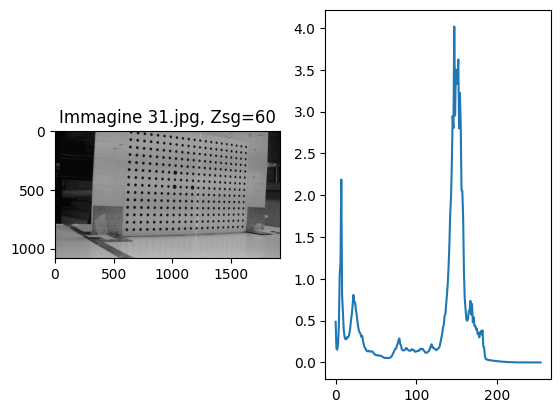

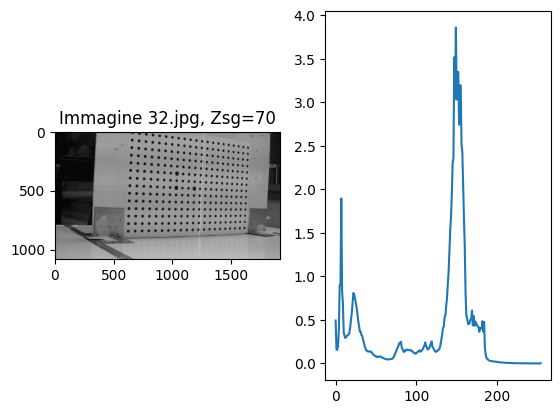

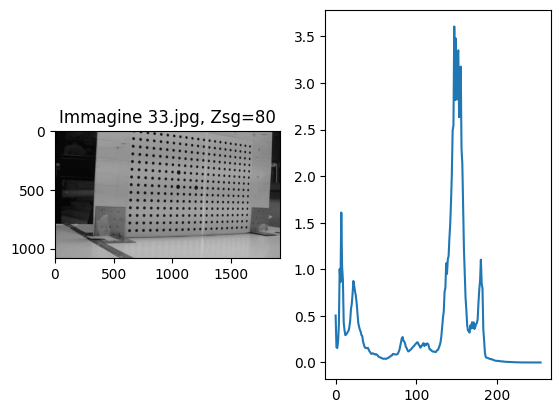

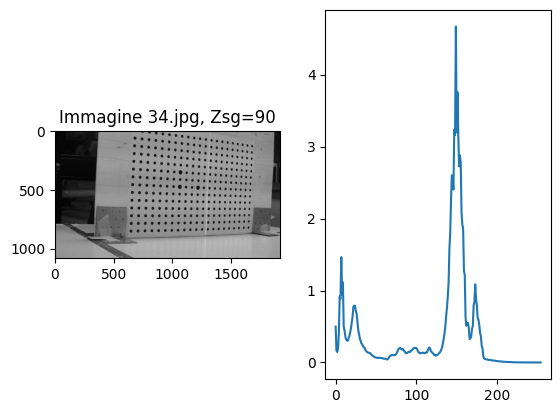

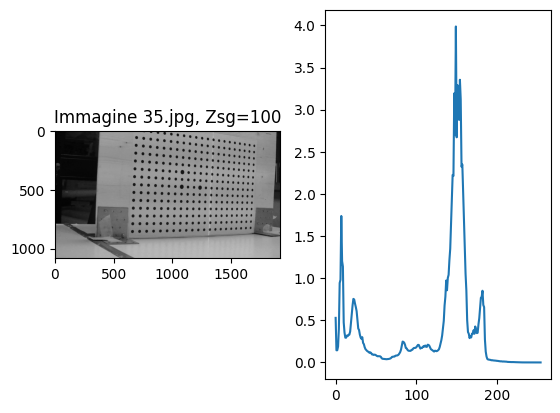

In [100]:
# Estrazione componente rossa
img_red_laser = []
for img in img_laser:
  red_laser = img[:,:,0]
  img_red_laser.append(red_laser)

# Plot delle immagini
for i, img in enumerate(img_red_laser):
    h, w = img.shape
    sz = h*w
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(img, cmap='gray')
    ax1.set_title(f'Immagine {img_laser_name[i]}, Zsg={zsg_array[i]}')
    pdf = np.histogram(img, bins=range(256))[0]/sz*100
    ax2.plot(pdf)


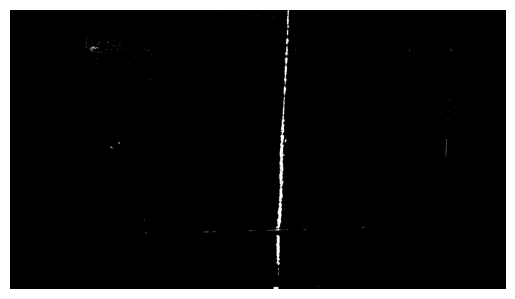

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Immagine 25.jpg - Media: 1036.354124748491, Dev. standard: 98.75965861171832
Numero di punti sulla linea immagine 25.jpg: 925


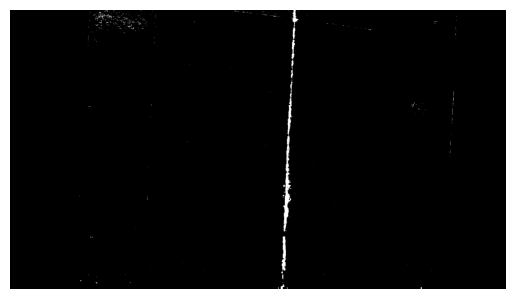

Immagine 26.jpg - Media: 1052.4105769230769, Dev. standard: 129.65141757974106
Numero di punti sulla linea immagine 26.jpg: 890


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


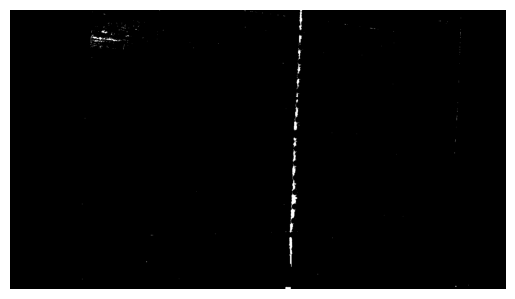

Immagine 27.jpg - Media: 1060.845054945055, Dev. standard: 176.02334745474192
Numero di punti sulla linea immagine 27.jpg: 801


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


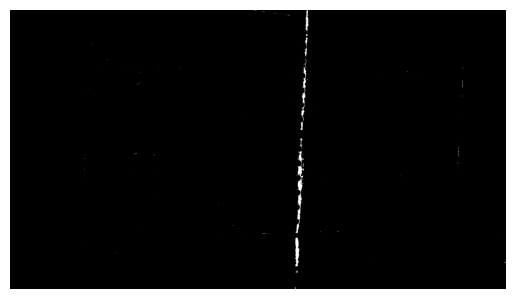

Immagine 28.jpg - Media: 1136.104700854701, Dev. standard: 73.12787169696385
Numero di punti sulla linea immagine 28.jpg: 873


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


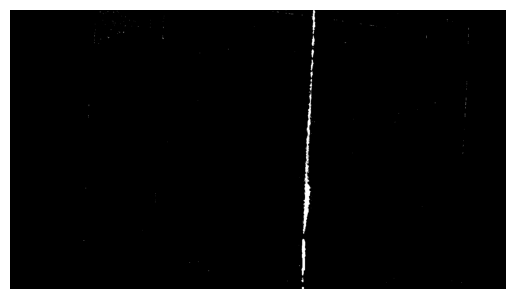

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Immagine 29.jpg - Media: 1153.6886699507388, Dev. standard: 66.47703125469627
Numero di punti sulla linea immagine 29.jpg: 896


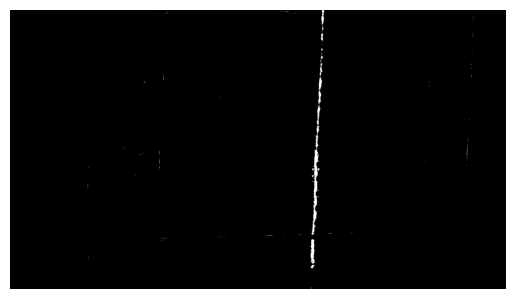

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Immagine 30.jpg - Media: 1182.22722513089, Dev. standard: 74.53132931437734
Numero di punti sulla linea immagine 30.jpg: 859


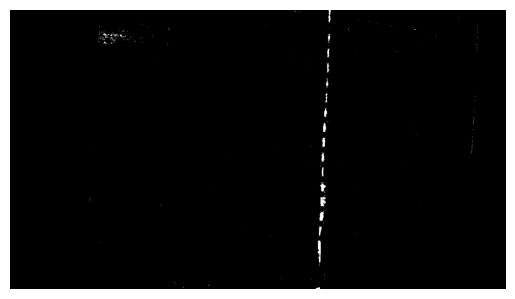

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Immagine 31.jpg - Media: 1192.8130381303813, Dev. standard: 236.9389393624837
Numero di punti sulla linea immagine 31.jpg: 683


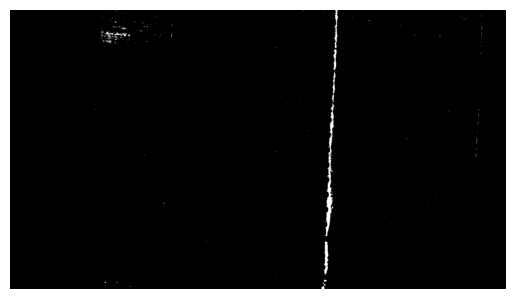

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Immagine 32.jpg - Media: 1203.3574879227053, Dev. standard: 145.0642160967242
Numero di punti sulla linea immagine 32.jpg: 939


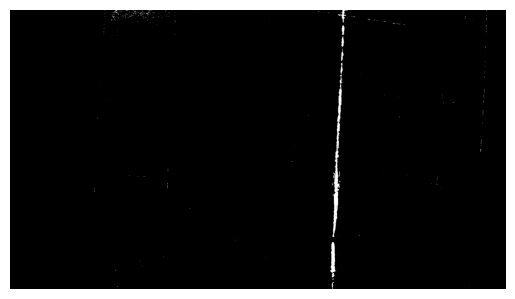

Immagine 33.jpg - Media: 1259.3946102021175, Dev. standard: 108.08017650003298
Numero di punti sulla linea immagine 33.jpg: 946


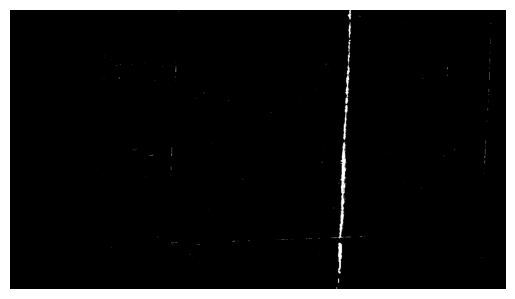

Immagine 34.jpg - Media: 1294.554794520548, Dev. standard: 86.08118881620197
Numero di punti sulla linea immagine 34.jpg: 916


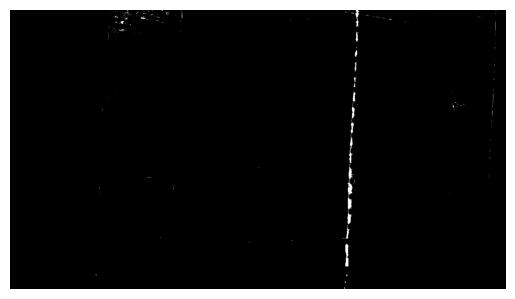

Immagine 35.jpg - Media: 1305.526717557252, Dev. standard: 171.92265955194887
Numero di punti sulla linea immagine 35.jpg: 784


In [101]:
"""
img = img_laser[0]

image_YCrCb = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)

Y, Cr, Cb = cv.split(image_YCrCb)

Y = cv.add(Y, -10)
Cr = cv.add(Cr, 20)
Cb = cv.add(Cb, 80)

img = cv.merge([Y, Cr, Cb])
img = cv.cvtColor(img, cv.COLOR_YCrCb2RGB)

#image_hls = cv.cvtColor(img, cv.COLOR_RGB2HLS)
#hue, lightness, saturation = cv.split(image_hls)

#lightness = cv.add(lightness, -50)

#img = cv.merge([hue, lightness, saturation])
i#mg = cv.cvtColor(img, cv.COLOR_HLS2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()
"""

"""
img = img_laser[0]
# Converti l'immagine da BGR a HLS
image_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)

# 2. Estrai i canali Hue, Lightness e Saturation
hue, lightness, saturation = cv.split(image_hls)

lightness = cv.add(lightness, 0)

# 3. Calcola il Chroma
# Chroma è calcolato come: Chroma = Saturation * (1 - |2*Lightness - 1|)
modulo = cv.absdiff(cv.multiply(lightness,2), 1)
secondo = cv.subtract(1, modulo)
chroma = cv.multiply(saturation, secondo)
#chroma = cv.absdiff(saturation, cv.multiply(cv.multiply(lightness, 2), 1 - np.abs(cv.subtract(lightness, 0.5))))
chroma = cv.add(chroma, 500)

img_chroma = cv.merge([hue, lightness, chroma])
img_chroma = cv.cvtColor(img_chroma, cv.COLOR_HLS2RGB)

plt.imshow(img_chroma)
plt.axis('off')
plt.show()
"""
img_laser_lines = [] # Array che contiene gli array che a loro volta contengono le coordinate delle lame di luce di ogni immagine

# Per ogni immagine binarizzo per estrarre la lama di luce corrispondente
for j, img in enumerate(img_laser):
    image_hls = cv.cvtColor(img, cv.COLOR_RGB2HLS)

    h, l, s = cv.split(image_hls)

    #s = cv.add(s, 250)
    #l = cv.add(l, -120)
    #h = cv.add(h, 10)

    s = cv.multiply(s, 7.1)
    l = cv.add(l, -10)
    h = cv.add(h, 0)

    img_s = cv.merge([h, l, s])
    img = cv.cvtColor(img_s, cv.COLOR_HLS2RGB)

    temp = img[:,:,0]
    h, w = temp.shape
    sz = h*w

    #pdf = np.histogram(temp, bins=range(256))[0]/sz*100
    #plt.plot(pdf)
    #plt.show

    ret, th = cv.threshold(temp, 254, 255, cv.THRESH_BINARY)
    plt.imshow(th, cmap='gray')
    plt.axis('off')
    plt.show()

    # Estrazione del baricentro della linea
    h, w = th.shape
    line = np.zeros( h ) # Creazione array di zeri
    for i in range( h ):
        line[i] = np.mean( np.where( th[i,:] != 0 ) ) # Calcolo della media tra i punti bianchi (==255) di ciascuna riga

    # Plot della linea sull'immagine iniziale
    img_line = img.copy()

    laser_line = []


    # Set dei pixel di line nell'immagine rgb, di colore nero
    count = 0
    for i in range(len(line)):
        if not math.isnan(line[i]):
            cv.circle(img_line, (int(line[i]), i), 1, (255,0,255), -1)
            img_line[i,int(line[i])] = [0,0,0]
            count = count + 1
            laser_line.append([int(line[i]), i])

    # Calcolo media e dev. standard per scartare i punti outliners
    laser_line_np = np.array(laser_line)
    laser_i = laser_line_np[:,0]
    mean_laser_i = np.mean(laser_i)
    std_laser_i = np.std(laser_i)
    print(f'Immagine {img_laser_name[j]} - Media: {mean_laser_i}, Dev. standard: {std_laser_i}')

    delta = 1

    laser_line_adj = [] # Vettore di punti che vanno bene!

    for point in laser_line:
        if point[0] < mean_laser_i - delta*std_laser_i or point[0] > mean_laser_i + delta*std_laser_i:
            count = count - 1
        else:
            laser_line_adj.append(point)


    print(f'Numero di punti sulla linea immagine {img_laser_name[j]}: {count}')

    img_laser_lines.append(laser_line_adj) # Riempimento dell'array (serve per dopo)

    #img_line = img.copy()
    #img_line[:,:,0] = 0
    #img_line[:,:,1] = 0
    #img_line[:,:,2] = 0

    #for i in range(len(laser_line)):
    #    cv.circle(img_line, laser_line[i], 1, (255,255,255), -1)

    # Plot dell'immagine
    #plt.imshow(img_line)
    #plt.axis('off')
    #plt.show()



In [102]:
# Ora si trova xsg,ysg della linea della lama di luce per ogni immagine considerando che ogni immagine abbia uno zsg noto

x_k_vec=[]
for i, zsg in enumerate(zsg_array):
    x_kj_vec=[]

    for laser_line in img_laser_lines[i]:
        i_s = laser_line[0]
        j_s = laser_line[1]

        A_kj = [ [m[0]-m[8]*i_s, m[1]-m[9]*i_s], [m[4]-m[8]*j_s, m[5]-m[9]*j_s]  ]
        b_kj = np.array([[i_s-(m[2]-m[10]*i_s)*zsg-m[3], j_s-(m[6]-m[10]*j_s)*zsg-m[7]]]).T
        x_kj = np.linalg.solve(A_kj,b_kj)
        x_kj_vec.append(x_kj)

    x_k_vec.append(x_kj_vec)# questo vettore in ogni posizone da 0 a 8 contiene tutti gli xsg,ysg,zsg relativi alla lama di lunce nelle immagini da 0 a 8
                            # cosi questo vettore poi va usato nella prossima cella per torvare i coefficente A,B,C del piano della lama

print(f"esempi di coordina te xsg,ysg del barricentro di alcune lame di luce:")
display(x_kj)

esempi di coordina te xsg,ysg del barricentro di alcune lame di luce:


array([[ 167.00747491],
       [-225.62707426]])

In [103]:
# quindi ora (come scritto a pagina 6,7,8 di SdV3D_Esercitazione08.pdf)trovo A,B,C del piano della lama di
# luce pasando le xsg,ysg,xsg trovate nel vettore x_k_vec per tutte le immagini nella cella precedente:

# Determinazione dei coefficientI A,B,C del piano della lama di luce

A_coefLMA_TOT=[]
b_LMA_TOT=[]

for i, zsg in enumerate(zsg_array):
    length = len(x_k_vec[i])
    vec_l = np.zeros((length), np.float32)

    #A_coefLMA_k=[]
    #b_LMA_k=[]
    for j in range(0,length):
        #A_coefLMA_k.append([float(x_k_vec[i][j][0]),float(x_k_vec[i][j][1]),1])
        #b_LMA_k.append(zsg)
        A_coefLMA_TOT.append([float(x_k_vec[i][j][0]),float(x_k_vec[i][j][1]),1])
        b_LMA_TOT.append(zsg)

print(f'===============================================================')
#cosi con la prossima riga cerco i coefficeni ABC del piano della lama cosnsiderando TUTTE le immagine:
ABC, res, rank, sing = np.linalg.lstsq( A_coefLMA_TOT, b_LMA_TOT ) #algoritmo di Levenberg-Marquardt (LMA) di ottimizzazione usato per la soluzione di problemi in forma di minimi quadrati non lineari≠≠
#display(ABC)
A=ABC[0]
B=ABC[1]
C=ABC[2]
print(f'I coefficenti del piano della lama di luce considerando tutte le immagini sono: \n A={A}\n B={B}\n C={C}')

I coefficenti del piano della lama di luce considerando tutte le immagini sono: 
 A=0.7531210014629192
 B=0.001475796700646237
 C=-31.226414839000533


<ipython-input-103-72561a291e4b>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A_coefLMA_TOT.append([float(x_k_vec[i][j][0]),float(x_k_vec[i][j][1]),1])
<ipython-input-103-72561a291e4b>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ABC, res, rank, sing = np.linalg.lstsq( A_coefLMA_TOT, b_LMA_TOT ) #algoritmo di Levenberg-Marquardt (LMA) di ottimizzazione usato per la soluzione di problemi in forma di minimi quadrati non lineari≠≠


In [104]:
# Estrazione delle variabili e salvataggio su file Drive
coeff = [A,B,C]
def vardump( var, fname ):
    with open(fname, 'wb') as fw:
        pickle.dump( var, fw )

vardump(coeff, os.path.join( OUTDIR, 'coefficientiPiano.dump'))